In [2]:
!pip install gensim
!pip install pyLDAvis

In [3]:
from google.colab import drive
drive.mount('/gdrive')

%cd /gdrive
%cd /gdrive/Shareddrives/Cohort_A_Team_A3/CIS509/Assignment_2/LDA


Mounted at /gdrive
/gdrive
/gdrive/Shareddrives/Cohort_A_Team_A3/CIS509/Assignment_2/LDA


In [4]:
# install gensim and pyLDAvis before you run this code
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [5]:
!python -m spacy download en_core_web_lg
spacy.cli.download("en_core_web_lg")

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=dea575b374566fde3cd1e0809ab180ed34c710a56260c9758e7b0b4c35e8be35
  Stored in directory: /tmp/pip-ephem-wheel-cache-ktq74la8/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [6]:
import pandas as pd
input_df = pd.read_csv("CovidVaccinated_csv_output.csv")

In [7]:
input_df.info()
input_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10883 entries, 0 to 10882
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MsgID        10883 non-null  object
 1   Timestamp    10883 non-null  object
 2   Author       10883 non-null  object
 3   ThreadID     10883 non-null  object
 4   ThreadTitle  10883 non-null  object
 5   MsgBody      10883 non-null  object
 6   ReplyTo      10883 non-null  object
 7   Permalink    10883 non-null  object
dtypes: object(8)
memory usage: 680.3+ KB


(10883, 8)

**Documents without preprocessing**

In [8]:
nlp = spacy.load("en_core_web_lg")

documents = []
for i in input_df["MsgBody"]:
    i = i.lstrip("'")
    i = i.rstrip("'")
    documents.append(i)

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        temp_list.append(str(token))
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(document) for document in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [9]:
#print(dictionary)
#print(corpus[0])
print(corpus_tfidf[2])

[(16, 0.0428361033441181), (18, 0.15342540988878192), (23, 0.2105991923048961), (27, 0.01864977541141366), (28, 0.2710269282025202), (29, 0.24581191423700782), (30, 0.265439910080887), (31, 0.3040397593659508), (32, 0.15360537910150668), (33, 0.21655140447770574), (34, 0.16781479255363943), (35, 0.08636394400419206), (36, 0.12913128761244755), (37, 0.3632250509555168), (38, 0.07463320451610478), (39, 0.40047983957915456), (40, 0.28554975133295063), (41, 0.12948210545686423), (42, 0.33789463561290517)]


**Documents with preprocessing**

In [10]:
documents = []
for line in input_df["MsgBody"]:
    text = line.lstrip("'")
    text = line.rstrip("'")
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","")
                        .replace("?","").replace("[","").replace("]","").replace(")","")
                        .replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ")
                        .replace("\\"," ")
                        .replace("*"," ").replace(" bot "," ").replace("-"," ")
                        .replace(":"," "))
        
#.replace(" r "," ")

processed_documents = [] # list for storing tokenized documents
for document in documents: 
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list) 
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [11]:
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=7) # train LDA model

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [12]:
for topic in lda_model.show_topics(num_topics=7, num_words=5):# show 5 most important words for each topic
    print(topic)

print(corpus_tfidf[0])
for topic_proportion in lda_model[corpus_tfidf[0]]: # show topic distribution for the first document in the corpus
    print(topic_proportion)
for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.007*"day" + 0.007*"get" + 0.006*"not" + 0.006*"second" + 0.006*"peer"')
(1, '0.006*"survival" + 0.004*"thank" + 0.004*"source" + 0.004*"lag" + 0.004*"Reddit"')
(2, '0.005*"vaccine" + 0.005*""" + 0.004*"know" + 0.004*"test" + 0.004*"people"')
(3, '0.007*"line" + 0.006*"stfu" + 0.005*"weather" + 0.005*"publication" + 0.004*"goalpost"')
(4, '0.009*"vaccine" + 0.007*"risk" + 0.007*">" + 0.006*"likely" + 0.006*"know"')
(5, '0.005*"vaccine" + 0.005*"medical" + 0.004*"base" + 0.004*"evidence" + 0.004*"side"')
(6, '0.005*"breakthrough" + 0.004*"booster" + 0.004*"practice" + 0.004*"immunity" + 0.004*"FDA"')
[(0, 0.32056042754783953), (1, 0.2790342406172653), (2, 0.4785295911539867), (3, 0.23787755202469912), (4, 0.31121058980612365), (5, 0.21100470674055094), (6, 0.39359402179706365), (7, 0.13343221680882378), (8, 0.36092142834423907), (9, 0.197017219740834), (10, 0.225009144753558)]
(0, 0.79312056)
(1, 0.034456775)
(2, 0.034482986)
(3, 0.034449216)
(4, 0.034498002)
(5, 0.03450999)
(6, 0

In [13]:
lda_visualization = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
pyLDAvis.display(lda_visualization)
# lambda = 0.8

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [14]:
# Coherence Measures
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # by changing the values for the "coherence" parameter, you can use different coherence methods (e.g., 'u_mass', 'c_v', 'c_uci', 'c_npmi')
coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.5208620499714114


In [15]:
# Coherence measures over different K
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model; k+2 because we are only intereseted when K >= 2
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

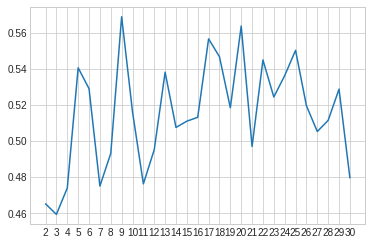

In [16]:
# Visualizaing coherence measures over different K
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [17]:
# Other parameters related to training 
#lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=?, chunksize=?, passes=?, iterations=?)